# AdventureWorks (Microsoft dataset)
## Análise Exploratória dos dados (EDA) de vendas

### Descrição
Nesse notebook será apresentada a biblioteca Pandas, uma biblioteca Python de código aberto para análise de dados. 
Ela dá ao Python a capacidade de trabalhar com dados do tipo planilha, permitindo carregar, manipular e combinar dados rapidamente, entre outras funções.

O Adventure Works é um dataset de exemplo criado pela Microsoft que simula uma empresa multinacional fictícia de manufatura chamada Adventure Works.



# Imports

In [449]:
#importando bibliotecas
import pandas as pd
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display  import HTML
from tabulate              import tabulate
from scipy                 import stats as ss

# Funções auxiliares

In [450]:
# Função para melhorar a visualização de gráficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
jupyter_settings()

# Função para calcular o V de Cramer (para variáveis categóricas)
def cramer_v(x,y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency(cm)[0]
    chi2_corr = max(0, (chi2-((k-1)*(r-1))/(n-1)))
    k_corr = k - ((k-1)**2)/(n-1)
    r_corr = r - ((r-1)**2)/(n-1)
    v = sqrt((chi2_corr/n)/min(k_corr-1,r_corr-1))
    
    return v

Populating the interactive namespace from numpy and matplotlib


## Carregando os dados

In [451]:
#verificando arquivo
df_raw = pd.read_excel('/content/drive/MyDrive/Data Science/DIO/Python para Ciência de Dados/Desafios de Projetos/dataset/AdventureWorks.xlsx')
df_raw.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


# Descrição dos dados

In [452]:
#criando cópia do dataframe inicial
df1 = df_raw.copy()

## Renomeando colunas

In [453]:
#renomear colunas para facilitar o trabalho futuro
df1.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [454]:
old_cols = ['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor']

df1.columns = df1.columns.str.replace(" ", "_", regex=True).str.lower()

In [455]:
df1.columns

Index(['data_venda', 'data_envio', 'id_loja', 'id_produto', 'id_cliente',
       'no._venda', 'custo_unitário', 'preço_unitário', 'quantidade',
       'valor_desconto', 'valor_venda', 'produto', 'fabricante', 'marca',
       'classe', 'cor'],
      dtype='object')

## Dimensão dos dados

In [456]:
#verificando o tamanho do dataframe
print( 'Número de linhas: {}' .format (df1.shape[0]) )
print( 'Número de colunas: {}' .format (df1.shape[1]) )

Número de linhas: 904
Número de colunas: 16


## Tipo dos dados

In [457]:
#verificando os tipos dos dados
df1.dtypes

data_venda        datetime64[ns]
data_envio        datetime64[ns]
id_loja                    int64
id_produto                 int64
id_cliente                 int64
no._venda                 object
custo_unitário           float64
preço_unitário           float64
quantidade                 int64
valor_desconto           float64
valor_venda              float64
produto                   object
fabricante                object
marca                     object
classe                    object
cor                       object
dtype: object

In [458]:
#trocando o tipo dos dados, visto que id_loja, id_produto e id_cliente não são inteiros, mas sim strings
df1[['id_loja', 'id_produto', 'id_cliente']] = df1[['id_loja', 'id_produto', 'id_cliente']].astype('object')
df1['id_loja'] = df1['id_loja'].apply(lambda x: 'loja 199' if x==199 else 'loja 306' if x==306 else 'loja 307')
df1.dtypes

data_venda        datetime64[ns]
data_envio        datetime64[ns]
id_loja                   object
id_produto                object
id_cliente                object
no._venda                 object
custo_unitário           float64
preço_unitário           float64
quantidade                 int64
valor_desconto           float64
valor_venda              float64
produto                   object
fabricante                object
marca                     object
classe                    object
cor                       object
dtype: object

## Check NA

In [459]:
#verificando a existência de NA's nas colunas 
df1.isna().sum()

data_venda        0
data_envio        0
id_loja           0
id_produto        0
id_cliente        0
no._venda         0
custo_unitário    0
preço_unitário    0
quantidade        0
valor_desconto    0
valor_venda       0
produto           0
fabricante        0
marca             0
classe            0
cor               0
dtype: int64

# Feature Engineering

In [460]:
# backup
df2 = df1.copy()

In [461]:
# Derivar algumas variáveis

#ano
df2['ano'] = df2['data_venda'].dt.year

#mes
df2['mes'] = df2['data_venda'].dt.month

#dia
df2['dia'] = df2['data_venda'].dt.day

#dia da semana
df2['dia_semana'] = df2['data_venda'].dt.weekday
df2['dia_semana'] = df2['dia_semana'].apply(lambda x: 'segunda' if x==0 else 'terca' if x== 1 else 'quarta' if x== 2 else 'quinta' if x== 3 else 'sexta' if x== 4 else 'sabado' if x== 5 else 'domingo')

#semana do ano
df2['ano_semana'] = df2['data_venda'].dt.strftime('%Y-%W')

In [462]:
# Alterando o tipo das novas variáveis
df2[['ano', 'mes', 'dia']] = df2[['ano', 'mes', 'dia']].astype('object')

In [463]:
# Calcular Lucro
df2['lucro'] = (df2['valor_venda']-df2['valor_desconto'])
df2.head()

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,ano,mes,dia,dia_semana,ano_semana,lucro
0,2008-05-09,2008-05-29,loja 199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,9,sexta,2008-18,4548.0
1,2008-05-12,2008-05-17,loja 306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,12,segunda,2008-19,4548.0
2,2008-05-14,2008-05-20,loja 306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,14,quarta,2008-19,4548.0
3,2008-05-21,2008-05-27,loja 306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,5,21,quarta,2008-20,4548.0
4,2008-06-20,2008-06-27,loja 306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2008,6,20,sexta,2008-24,4548.0


# Estatística Descritiva

In [464]:
#Separando as colunas em atributos numéricos e categóricos
num_attributes = df2.select_dtypes( include=['int64', 'float64', 'int32'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'int32' , 'datetime64[ns]'] )

In [465]:
df1.dtypes

data_venda        datetime64[ns]
data_envio        datetime64[ns]
id_loja                   object
id_produto                object
id_cliente                object
no._venda                 object
custo_unitário           float64
preço_unitário           float64
quantidade                 int64
valor_desconto           float64
valor_venda              float64
produto                   object
fabricante                object
marca                     object
classe                    object
cor                       object
dtype: object

## Atributos Numéricos

In [466]:
# Verificando as estatísticas dos atributos numéricos
num_attributes.agg(["mean","median","std","min","max","skew","kurtosis"]).T.reset_index().rename(columns={'index': 'attributes'})

,attributes,mean,median,std,min,max,skew,kurtosis
0,custo_unitário,272.006150,330.660,129.765051,5.09,348.58,-1.562495,0.474045
1,preço_unitário,742.527965,980.000,368.589889,9.99,999.00,-1.331631,0.094445
2,quantidade,62.950221,9.000,148.945964,2.00,1560.00,4.567974,29.487391
3,valor_desconto,689.123294,461.166,822.363117,0.00,6272.00,1.905400,5.484719
4,valor_venda,6620.139538,5798.700,4319.407257,159.84,29400.00,1.502398,2.969994
5,lucro,5931.016245,5029.800,4045.710991,159.84,29400.00,1.578945,3.494536


## Atributos categóricos

In [467]:
#verificando quantas categorias cada atributo possui 
cat_attributes.apply(lambda x: x.unique().shape[0])

id_loja         3
id_produto      9
id_cliente    168
no._venda     821
produto         9
fabricante      3
marca           3
classe          2
cor             5
ano             2
mes            12
dia            31
dia_semana      7
ano_semana    101
dtype: int64

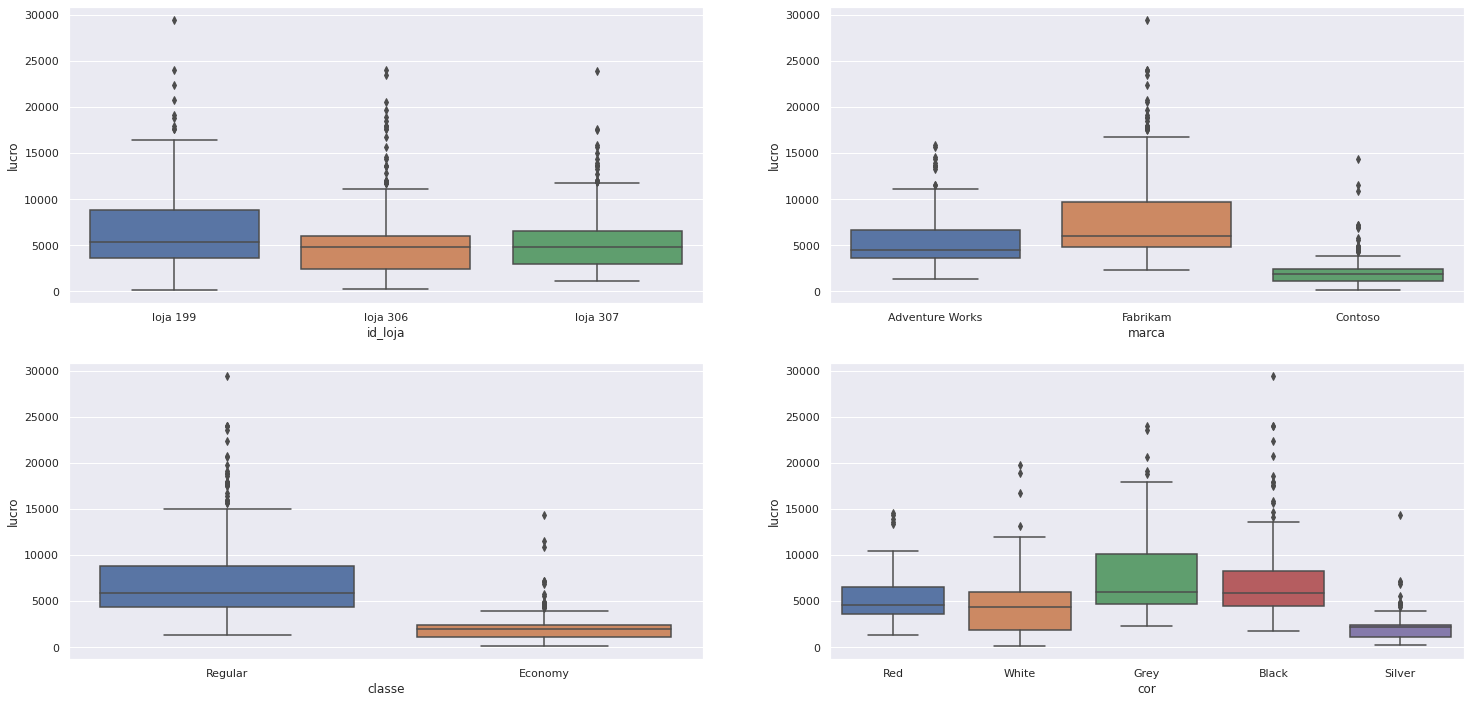

In [468]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2)

# assumindo que a variável lucro é a variável resposta:
sns.boxplot(x='id_loja', y='lucro', data=df2, ax=ax[0,0])
sns.boxplot(x='marca', y='lucro', data=df2, ax=ax[0,1])
sns.boxplot(x='classe', y='lucro', data=df2, ax=ax[1,0])
sns.boxplot(x='cor', y='lucro', data=df2, ax=ax[1,1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

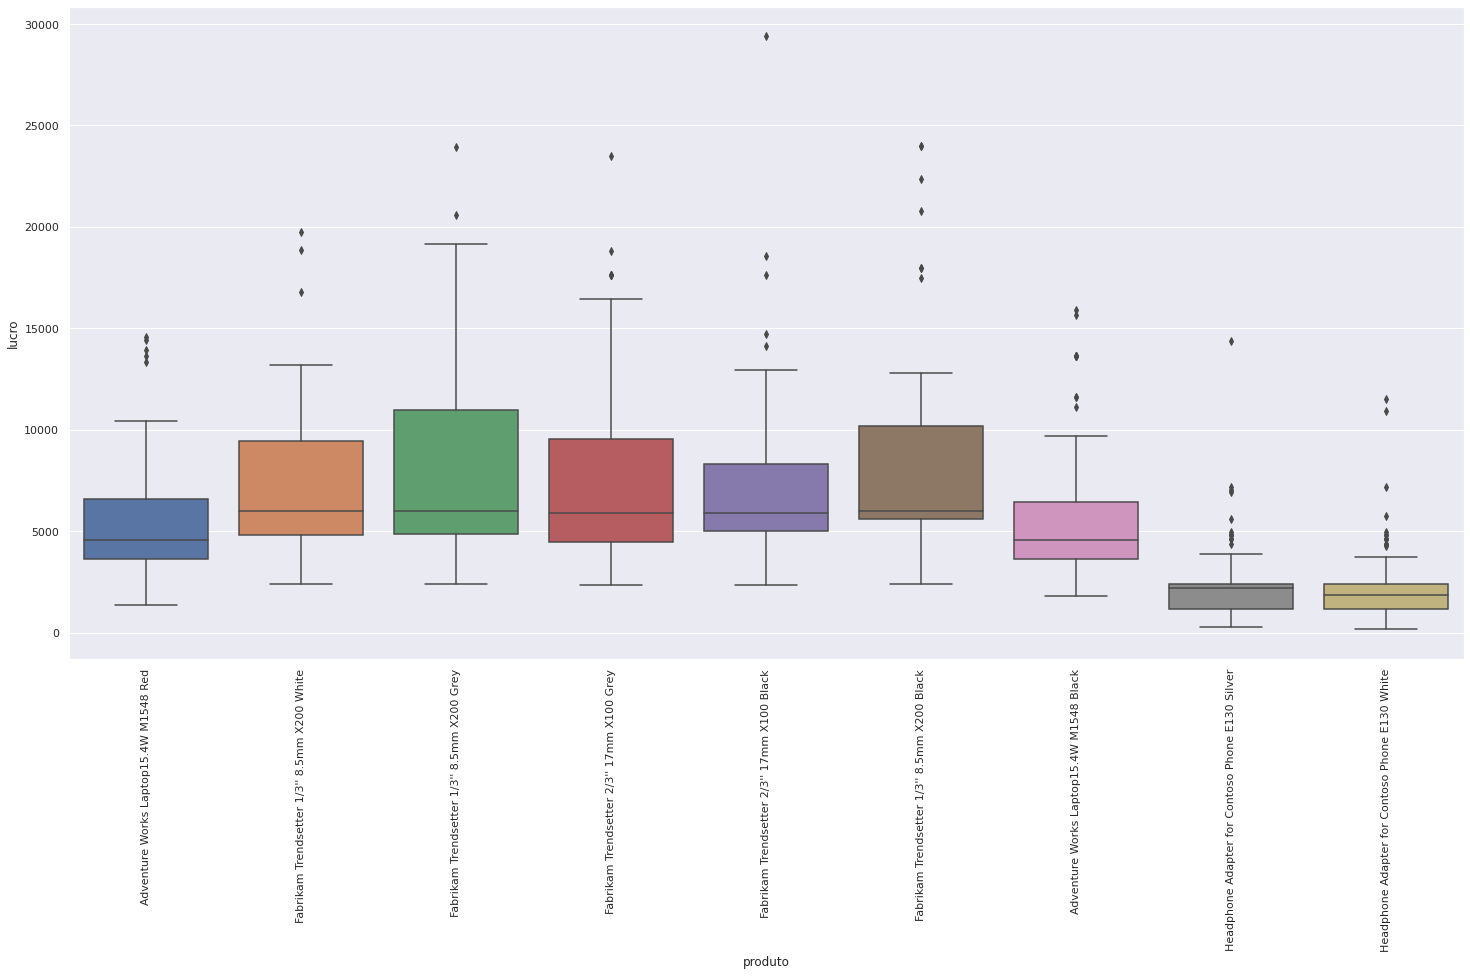

In [469]:
# plotando os produtos X lucro de forma isolada para conseguir visualizar melhor. Optei por mostrar os nomes dos produtos ao invés de seus códigos
sns.set_style("darkgrid")
sns.boxplot(x='produto', y='lucro', data=df2)
plt.xticks(rotation=90)

## Hipóteses para análise

Como não temos muitas informações sobres Clientes ou Localização, vamos focar em hipóteses geradas por Lojas e Produtos, focando em seus Preços, Descontos e Custos.

1. Lojas com maior desconto vendem mais;

2. Lojas deveriam vender menos aos finais de semana;

3. Produto com maior descontos vendem mais;

4. Produtos com menores preços unitários vendem mais;

# Análise Exploratória de Dados

In [470]:
df3 = df2.copy()

## Análise Univariada

Entender o comportamente de cada variável de forma independente;

### Variável resposta

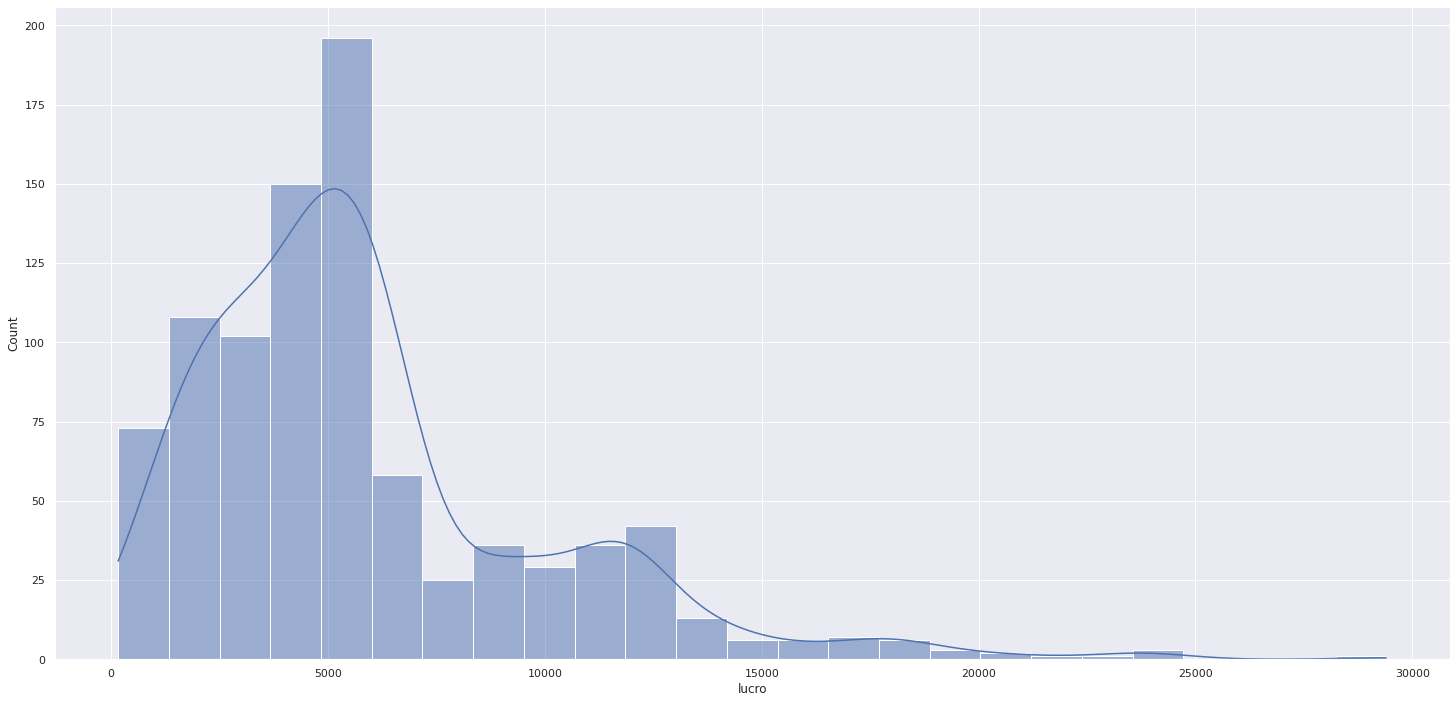

In [493]:
# Construindo um histograma para entender a distribuição da variável resposta (valor_venda):
sns.histplot(data=df3['lucro'], bins = 25, kde = True)
# - Distribuição assimétrica positiva (moda está concentrada do lado esquerdo da curva)
# - Curtose alta, ou seja, distribuição é mais concentrada e alta do que a distribuição normal (distribuição leptocúrtica)
# - Dados não são tão independentes e possuem uma distribuição um pouco diferente da distribuição normal.


### Variáveis numéricas

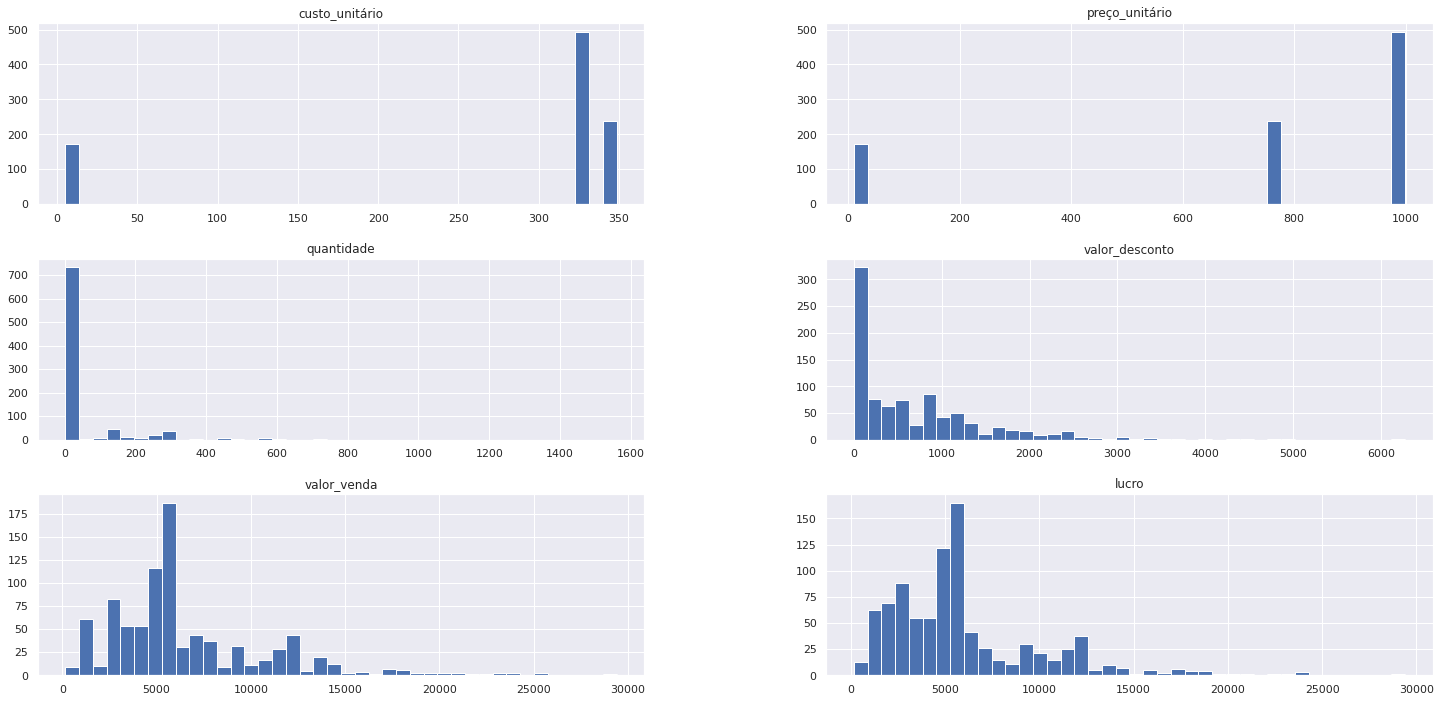

In [472]:
# Construindo histogramas para entender a distribuição das variáveis numéricas:
num_attributes.hist(bins=40);

# - O custo unitário gira em torno de 330 a 350, havendo alguns produtos com custo próximo a 10;
# - O preço unitário apresenta três valores, variando de 1000, 800 até próximo de 10. Importante enteder qual o custo de cada um desses;
# - A maioria das vendas são de produtos isolados, tendo uma cesta pequena; Insight interessante;
# - A maioria do descontos nas vendas gira em torno de 100, porém há descontos de mais de 3000;

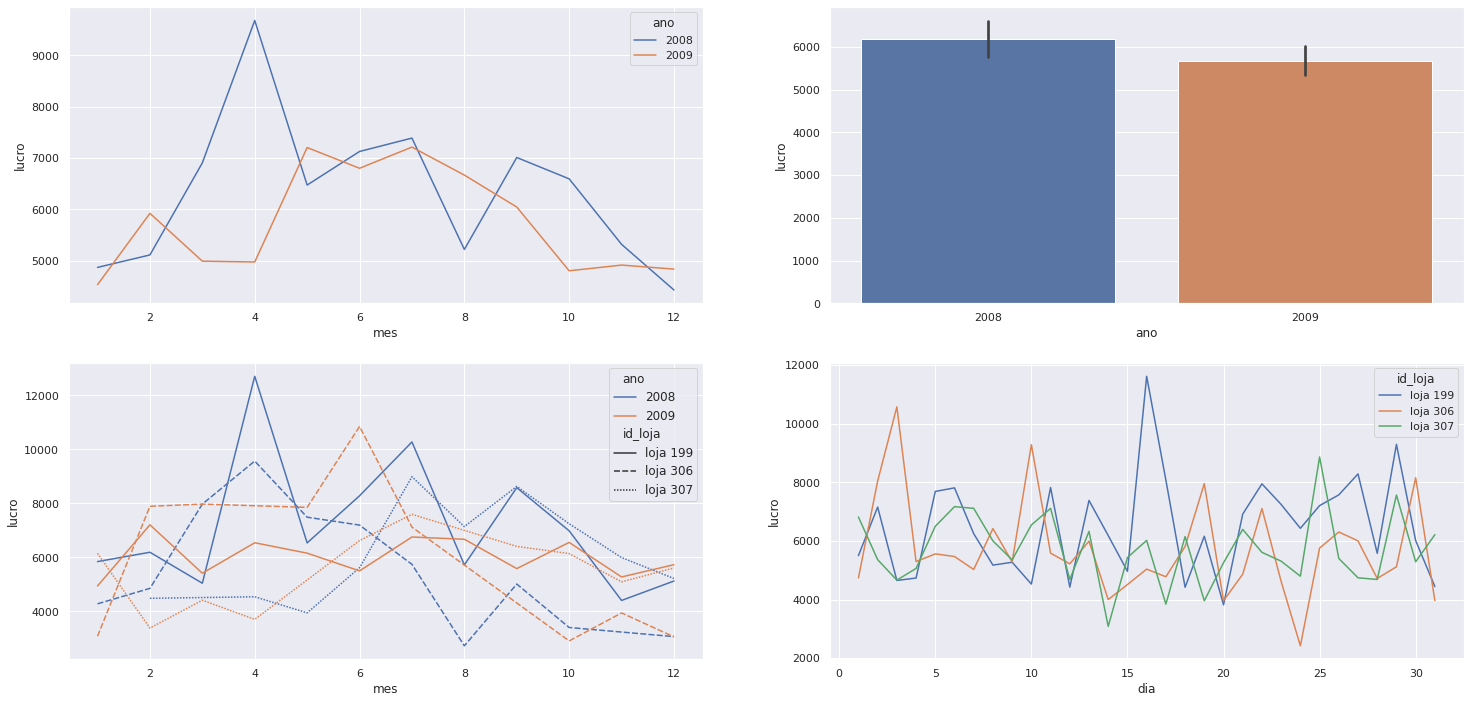

In [473]:
# Em relação ao tempo
ax = plt.subplot(2,2,1)
sns.lineplot(data=df3, x='mes', y='lucro', hue='ano', ci=None, palette="deep")

ax = plt.subplot(2,2,2)
sns.barplot(data=df3, x='ano', y='lucro')

ax = plt.subplot(2,2,3)
sns.lineplot(data=df3, x='mes', y='lucro', hue='ano', style='id_loja', ci=None, palette="deep")

ax = plt.subplot(2,2,4)
sns.lineplot(data=df3, x='dia', y='lucro', hue='id_loja', ci=None, palette="deep")

### Variáveis categóricas

In [474]:
cat_attributes = df3.select_dtypes( exclude=['int64', 'float64', 'int32' , 'datetime64[ns]'] )
cat_attributes.columns

Index(['id_loja', 'id_produto', 'id_cliente', 'no._venda', 'produto',
       'fabricante', 'marca', 'classe', 'cor', 'ano', 'mes', 'dia',
       'dia_semana', 'ano_semana'],
      dtype='object')

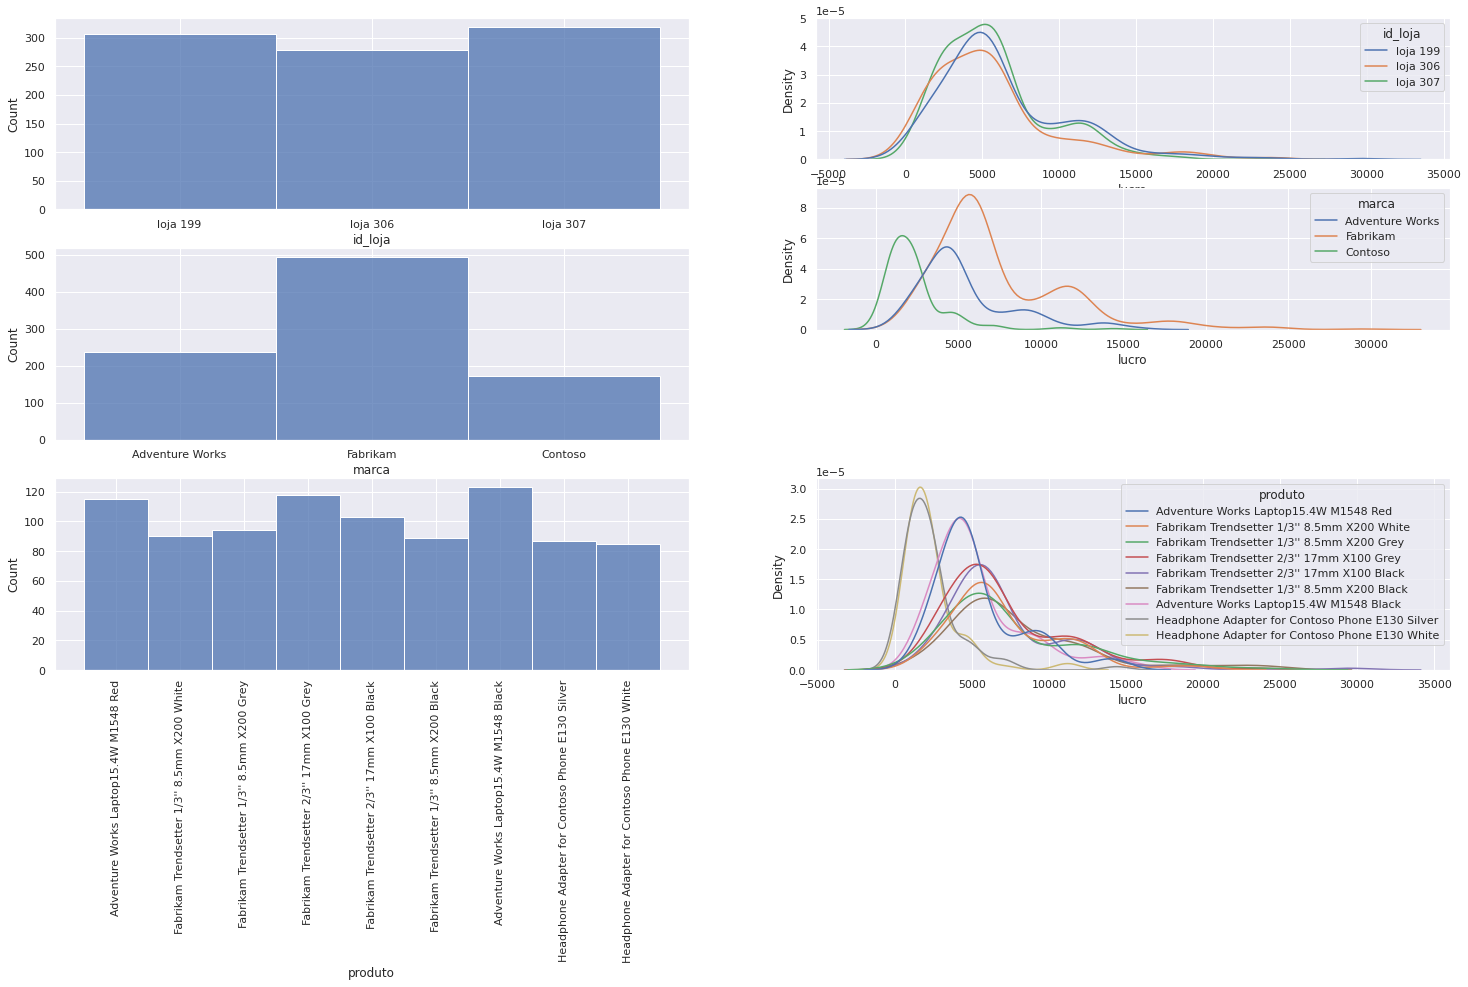

In [475]:
# Para variáveis categóricas, construí a Estimativa de Densidade Kernel, além do contagem de linhas, para conseguir
#estimar como seria uma distribuição, considerando cada pico presente no dataset.

# id_loja
ax = plt.subplot(3,2,1)
sns.histplot(x='id_loja', data=df3, bins = 3, discrete= True)
ax = plt.subplot(4,2,2)
sns.kdeplot(data=df3, x="lucro", hue="id_loja")
# Não há uma grande diferença entre as vendas de cada loja, todas possuindo distribuições bastante semelhante entre si;

# marca
ax = plt.subplot(3,2,3)
sns.histplot(x='marca', data=df3, bins = 3, discrete= True)
ax = plt.subplot(4,2,4)
sns.kdeplot(data=df3, x="lucro", hue="marca")
# A marca Fabrikam se destaca nas vendas, tendo a maior quantidade de vendas, enquanto contoso tem a menor;

#produto
ax = plt.subplot(3,2,5)
sns.histplot(x='produto', data=df3, bins = 3, discrete= True)
plt.xticks(rotation=90)
ax = plt.subplot(3,2,6)
sns.kdeplot(data=df3, x="lucro", hue="produto")
# Em relação a produtos, podemos ver o destaque de três deles em relação a quantidade vendida, que são os laptops e um trendsetter;
# Pelo valor vendido, percebemos que os headphones possuem preços semelhantes, visto que possuem vendas totais bem parecidas.

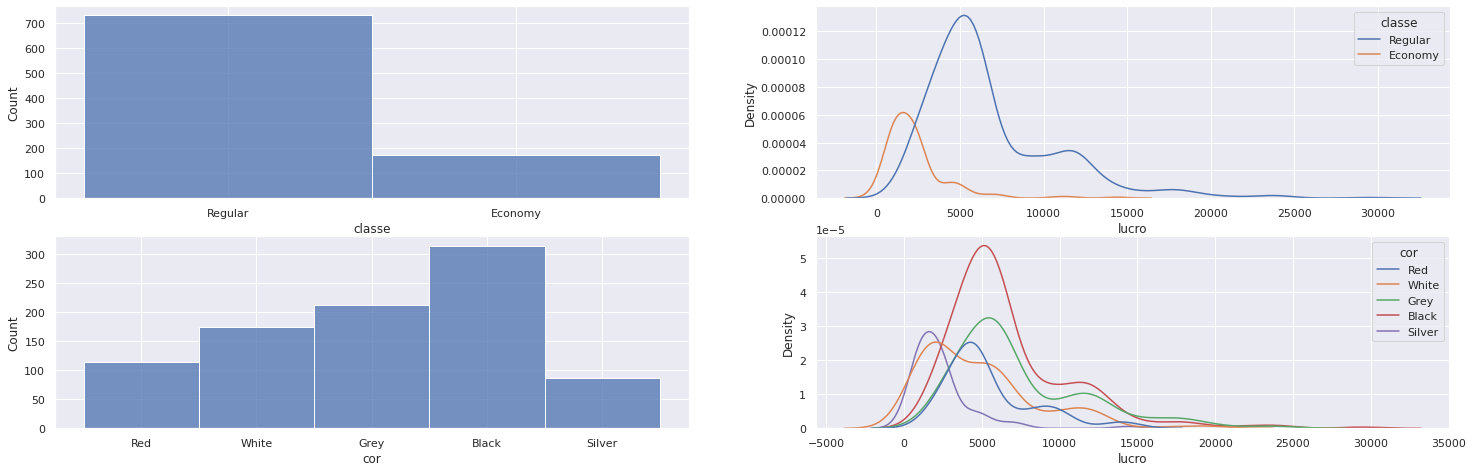

In [476]:
# classe
ax = plt.subplot(3,2,1)
sns.histplot(x='classe', data=df3, bins = 3, discrete= True)
ax = plt.subplot(3,2,2)
sns.kdeplot(data=df3, x="lucro", hue="classe")
# A classe regular possui o maior número de registro de vendas, assim como a maior mediana de valor vendido

# cor
ax = plt.subplot(3,2,3)
sns.histplot(x='cor', data=df3, bins = 3, discrete= True)
ax = plt.subplot(3,2,4)
sns.kdeplot(data=df3, x="lucro", hue="cor")
# Produots pretos tendem a vender mais do que os outros, possuindo maior quantidade de registros de venda e maior média de valor de venda.

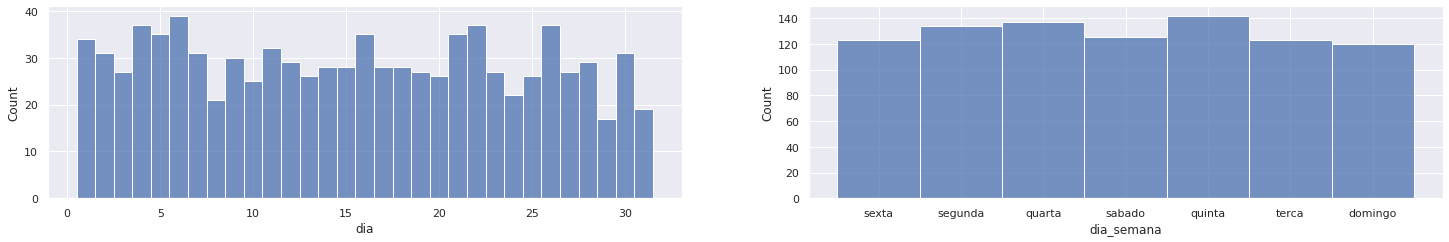

In [477]:
# Analisando as vendas em relação ao tempo de forma categórica

# dia
ax = plt.subplot(3,2,1)
sns.histplot(x='dia', data=df3, bins = 2, discrete= True)
# Os dias iniciais dos meses tendem a vender mais, podendo haver relação por ser próximo ao dia de recebimento de salários;
# percebemos um segundo pco de vendas após o dia 15, podendo haver relação por ser próximo ao dia de recebimento de salários;

#dia_semana
ax = plt.subplot(3,2,2)
sns.histplot(x='dia_semana', data=df3, bins = 5, discrete= True)
#Não há diferença expressiva em relação ao registro de vendas por dia da semana, apenas que no final de semana temos as piores performances de


## Análise Bivariada

In [478]:
df4 = df3.copy()

Entender o comportamento e correlação entre duas variáveis baseando nas hipóteses traçadas anteriormente:

### 1 - Lojas com maior desconto vendem mais;



**VERDADEIRO**, podemos perceber que há uma correlação positiva entre o valor de venda e os valores dos descontos aplicados, porém a correlação é maior em relação a quantidade vendida;

In [479]:
# comparando em relação o total
aux1 = df4[['id_loja', 'valor_venda', 'valor_desconto', 'quantidade', 'lucro']].groupby('id_loja').sum().reset_index()
aux1.head()

,id_loja,valor_venda,valor_desconto,quantidade,lucro
0,loja 199,2.181104e+06,211611.5980,20119,1.969492e+06
1,loja 306,1.723854e+06,158067.7754,12215,1.565786e+06
2,loja 307,2.079648e+06,253288.0840,24573,1.826360e+06


In [480]:
# comparando em relação a média
aux1 = df4[['id_loja', 'valor_venda', 'valor_desconto', 'quantidade', 'lucro']].groupby('id_loja').mean().reset_index()
aux1.head()

,id_loja,valor_venda,valor_desconto,quantidade,lucro
0,loja 199,7104.573590,689.288593,65.534202,6415.284997
1,loja 306,6200.912283,568.589120,43.938849,5632.323163
2,loja 307,6519.274094,794.006533,77.031348,5725.267561


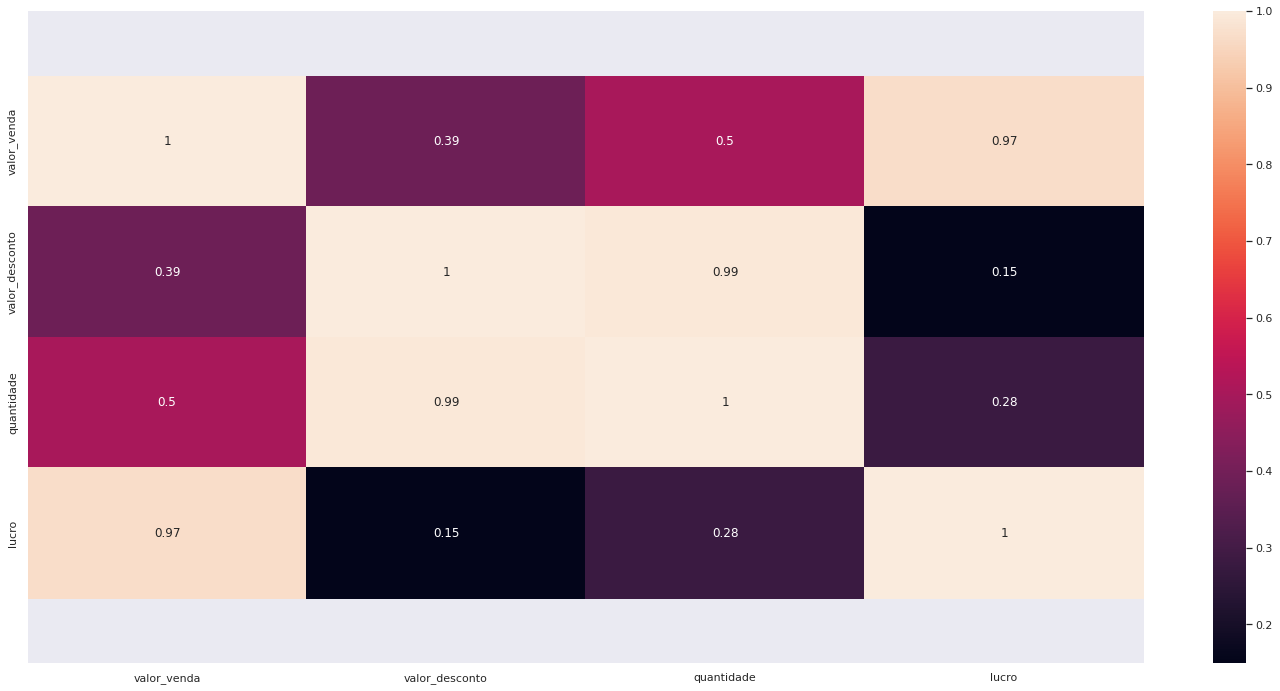

In [481]:
x = sns.heatmap(aux1.corr(method='pearson'), annot=True)
bottom, top = x.get_ylim()
x.set_ylim(bottom+0.5,top-0.5);

### 2 - Lojas deveriam vender menos aos finais de semana;



**VERDADEIRO**, apesar de ser pouco representativo, vimos anteriormente na análise univariada que realmente há menor quantidade de vendas na sexta, no sábado e no domingo.

### 3 - Produto com maior descontos vendem mais;


**VERDADEIRO**, há uma correlação fortíssima entre o valor vendido e os descontos aplicados, havendo também uma correlação negativa entre o valor de venda e a quantidade vendida. Apesar de não vender a maior quantidade, dentro do período analisado, vemos que o Fabrikam Trendsetter 1/3'' 8.5mm X200 Black possui a maior média de valor de venda (assim como o acumulado), possuindo a maior média de desconto e a maior média de quantidade vendida;

In [482]:
# comparando em relação o total
aux1 = df4[['produto', 'valor_venda', 'valor_desconto', 'quantidade', 'lucro']].groupby('produto').sum().reset_index()
aux1.head()

,produto,valor_venda,valor_desconto,quantidade,lucro
0,Adventure Works Laptop15.4W M1548 Black,746789.18,78672.82,1089,668116.36
1,Adventure Works Laptop15.4W M1548 Red,709813.94,83812.06,1047,626001.88
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,799809.39,83306.61,884,716502.78
3,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,781334.20,61975.80,845,719358.40
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,714029.08,73392.92,789,640636.16


In [483]:
# comparando em relação a média
aux1 = df4[['produto', 'valor_venda', 'valor_desconto', 'quantidade', 'lucro']].groupby('produto').mean().reset_index()
aux1.head()

,produto,valor_venda,valor_desconto,quantidade,lucro
0,Adventure Works Laptop15.4W M1548 Black,6071.456748,639.616423,8.853659,5431.840325
1,Adventure Works Laptop15.4W M1548 Red,6172.295130,728.800522,9.104348,5443.494609
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,8986.622360,936.029326,9.932584,8050.593034
3,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,8312.065957,659.317021,8.989362,7652.748936
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,7933.656444,815.476889,8.766667,7118.179556


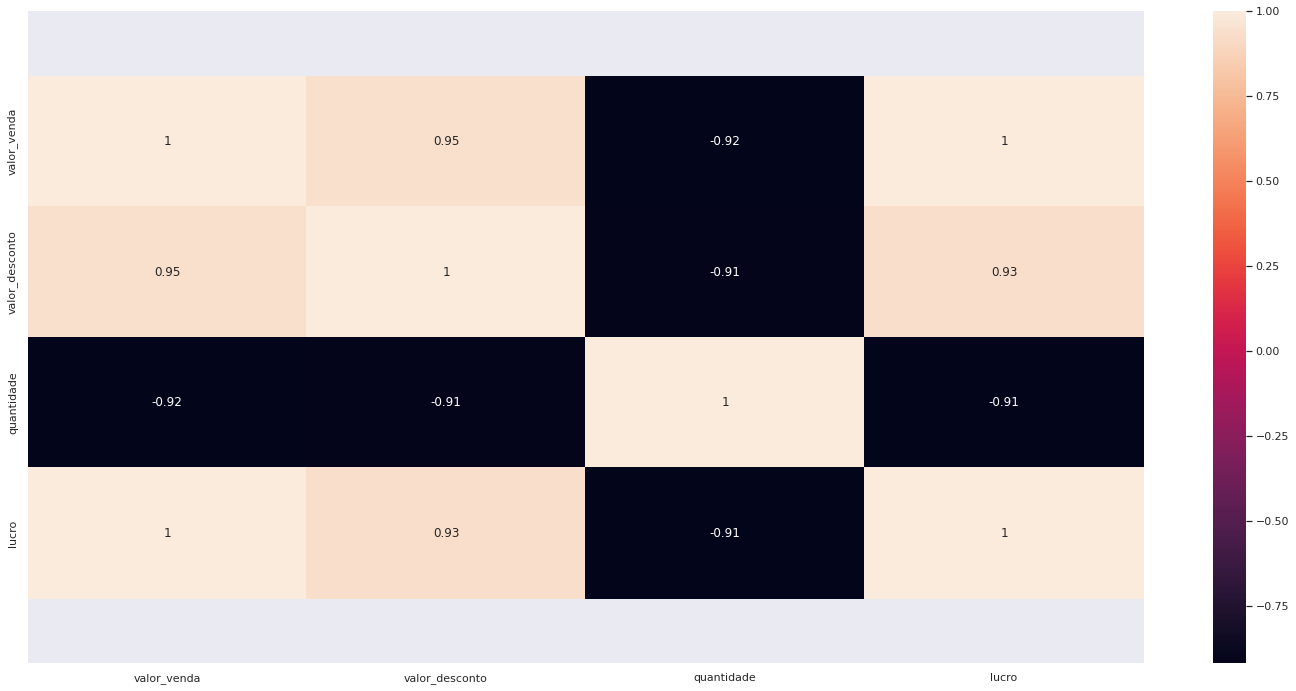

In [484]:
x = sns.heatmap(aux1.corr(method='pearson'), annot=True)
bottom, top = x.get_ylim()
x.set_ylim(bottom+0.5,top-0.5);

### 4 - Produtos com menores preços unitários vendem mais;

**VERDADEIRO**, vendem a maior quantidade por ter o preço baixo, mas trazem o menor valor de venda;

In [485]:
# comparando em relação o total
aux1 = df4[['produto','preço_unitário', 'valor_venda', 'quantidade', 'lucro']].groupby(['produto', 'preço_unitário']).sum().reset_index()
aux1.head()

,produto,preço_unitário,valor_venda,quantidade,lucro
0,Adventure Works Laptop15.4W M1548 Black,758.0,746789.18,1089,668116.36
1,Adventure Works Laptop15.4W M1548 Red,758.0,709813.94,1047,626001.88
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,999.0,799809.39,884,716502.78
3,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,998.0,781334.20,845,719358.40
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,998.0,714029.08,789,640636.16


In [486]:
# comparando em relação a média
aux1 = df4[['produto','preço_unitário', 'valor_venda', 'quantidade', 'lucro']].groupby('produto').mean().reset_index()
aux1.head()

,produto,preço_unitário,valor_venda,quantidade,lucro
0,Adventure Works Laptop15.4W M1548 Black,758.0,6071.456748,8.853659,5431.840325
1,Adventure Works Laptop15.4W M1548 Red,758.0,6172.295130,9.104348,5443.494609
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,999.0,8986.622360,9.932584,8050.593034
3,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,998.0,8312.065957,8.989362,7652.748936
4,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,998.0,7933.656444,8.766667,7118.179556


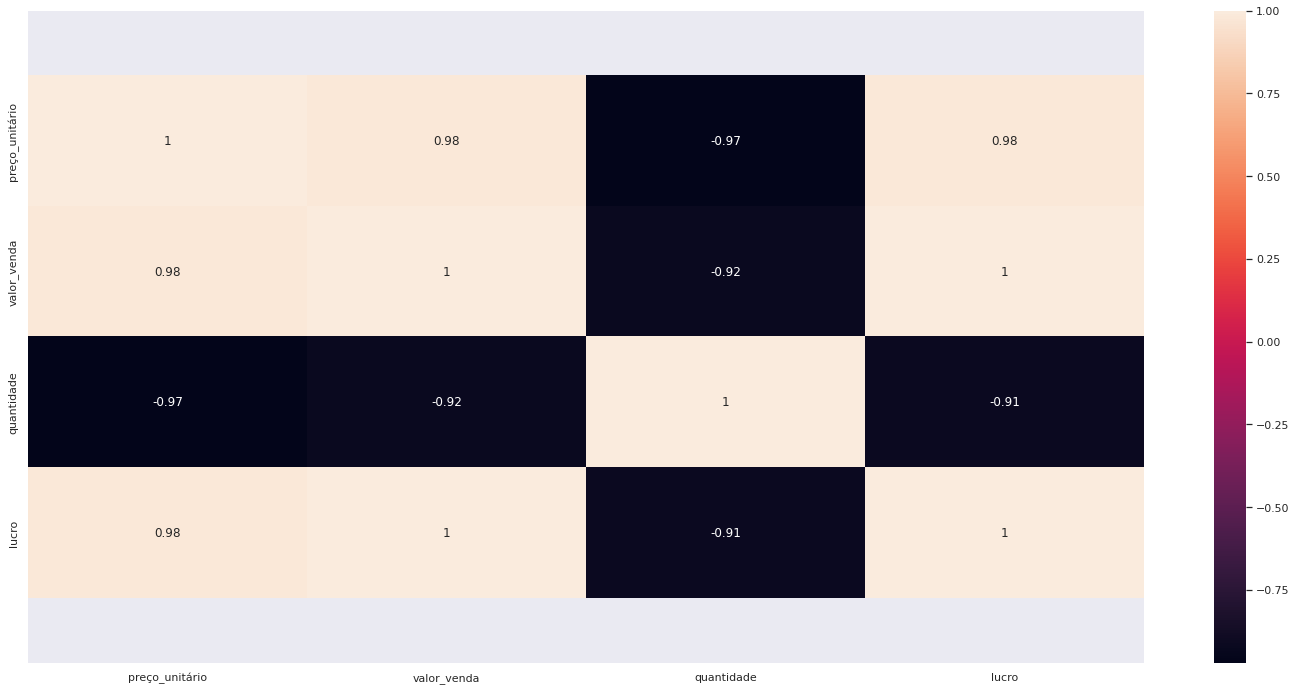

In [487]:
x = sns.heatmap(aux1.corr(method='pearson'), annot=True)
bottom, top = x.get_ylim()
x.set_ylim(bottom+0.5,top-0.5);

## Resumo da EDA

In [488]:
tab = [['Hipóteses', 'Conclusão', 'Relevância (baseada em insights)'],
      ['H1 - Lojas com maior desconto vendem mais', 'Verdadeiro', 'Baixo'],
      ['H2 - Lojas deveriam vender menos aos finais de semana', 'Verdadeiro', 'Baixo'],
      ['H3 - Produto com maior descontos vendem mais', 'Verdadeiro', 'Baixo'],
      ['H3 - Produtos com menores preços unitários vendem mais', 'Verdadeiro', 'Baixo'],
      ]
print(tabulate(tab, headers = 'firstrow'))

Hipóteses                                               Conclusão    Relevância (baseada em insights)
------------------------------------------------------  -----------  ----------------------------------
H1 - Lojas com maior desconto vendem mais               Verdadeiro   Baixo
H2 - Lojas deveriam vender menos aos finais de semana   Verdadeiro   Baixo
H3 - Produto com maior descontos vendem mais            Verdadeiro   Baixo
H3 - Produtos com menores preços unitários vendem mais  Verdadeiro   Baixo


# Análise Multivariada

## Variáveis Numéricas

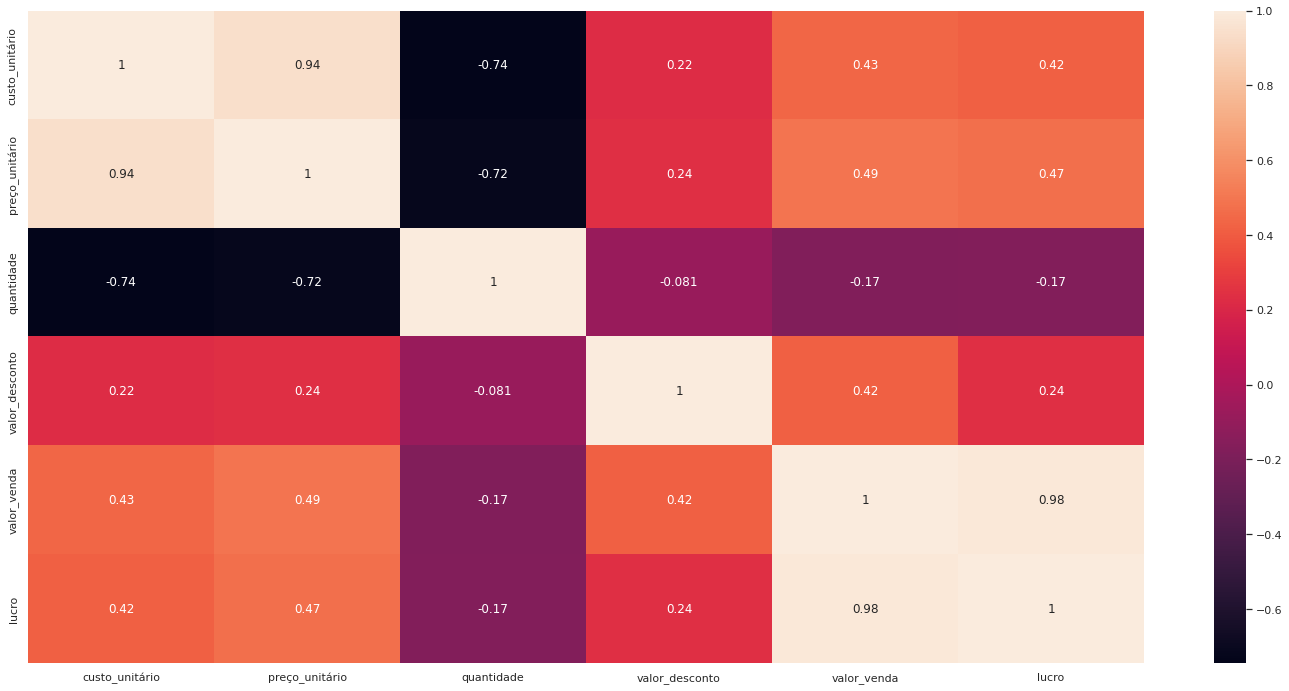

In [489]:
sns.heatmap(num_attributes.corr(method='pearson'), annot=True)

## Variáveis Categóricas

In [490]:
cat = df4.select_dtypes(include=['object'])
cat.columns

Index(['id_loja', 'id_produto', 'id_cliente', 'no._venda', 'produto',
       'fabricante', 'marca', 'classe', 'cor', 'ano', 'mes', 'dia',
       'dia_semana', 'ano_semana'],
      dtype='object')

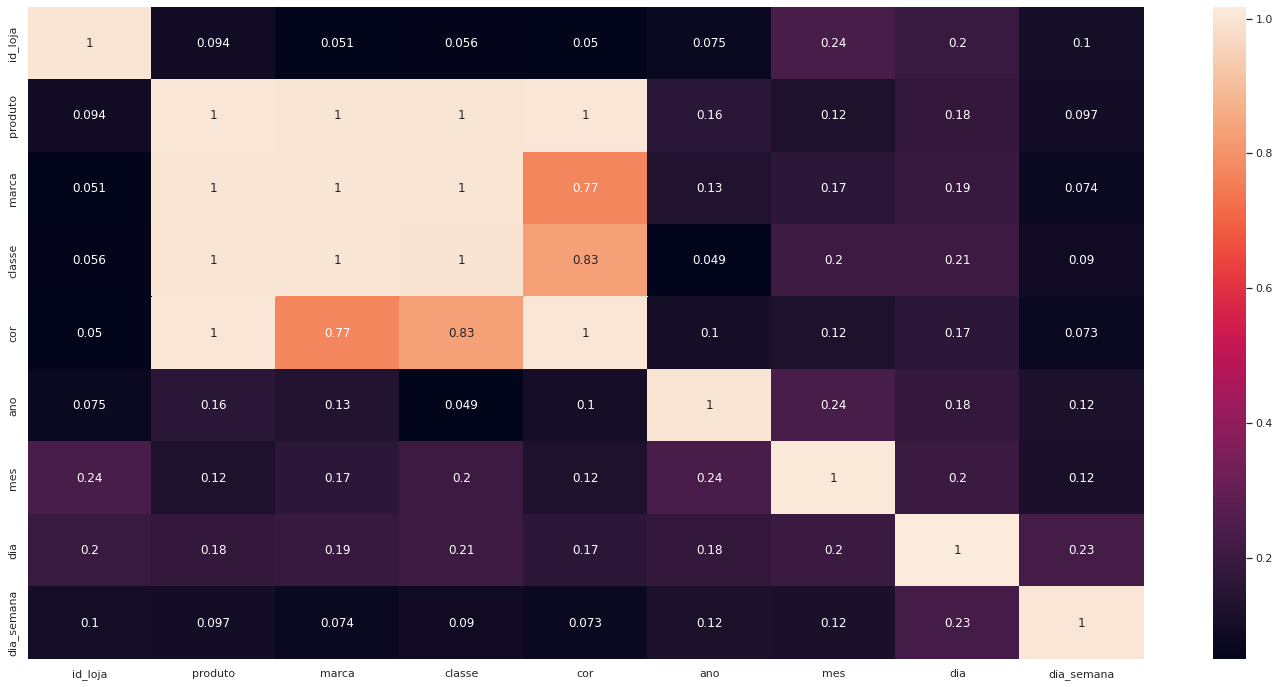

In [491]:
cat = df4.select_dtypes(include=['object'])
cat_list = ['id_loja', 'produto','marca', 'classe', 'cor', 'ano', 'mes', 'dia', 'dia_semana']
cat_dic = {}


for c1 in cat_list:
    for c2 in cat_list:
        v = cramer_v(cat[c1], cat[c2])

        if cat_list.index(c2) == 0:
            cat_dic[c1] = []
            cat_dic[c1].append(v)

        else:
            cat_dic[c1].append(v)


cramer_v_table = pd.DataFrame(cat_dic)
cramer_v_table.set_index(cramer_v_table.columns, inplace=True)


sns.heatmap(cramer_v_table, annot=True)